In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("mnist.csv").values

In [6]:
df.shape

(9999, 785)

In [7]:
X = df[: , :-1]

In [8]:
y = df[:, -1]

In [9]:
X.shape

(9999, 784)

In [10]:
y.shape

(9999,)

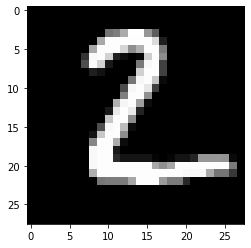

In [15]:
plt.imshow(X[0].reshape(28,28), cmap="gray")

In [17]:
y[0]

2

In [22]:
split = int(0.8*(X.shape[0]))

In [24]:
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

In [26]:
X_train.shape, y_train.shape

((7999, 784), (7999,))

In [27]:
def dist(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [28]:
def knn(X, y, x_query, k = 5):
    m = X.shape[0]
    distances = []
    for i in range(m):
        d = dist(x_query, X[i])
        distances.append((d, y[i]))
        
    distances = sorted(distances)[:k]
    
    distances = np.array(distances)
    labels = distances[:, -1]
    
    
    
    labels, freq = np.unique(labels, return_counts=True)
        
    idx = np.argmax(freq)
    pred = labels[idx]
    
    return pred

In [42]:
pred = []
for i in range(50):
    p = knn(X_train, y_train, X_test[i] )
    pred.append(int(p))

In [44]:
print(pred)

[4, 9, 9, 7, 1, 1, 9, 0, 7, 8, 3, 4, 8, 6, 3, 8, 0, 9, 6, 2, 1, 0, 1, 0, 6, 2, 3, 8, 9, 0, 7, 2, 3, 4, 5, 5, 2, 8, 5, 4, 6, 6, 6, 7, 9, 1, 8, 2, 1, 5]


In [48]:
def accuracy(y_test, y_pred):
    return sum(y_test == y_pred)/y_test.shape[0]

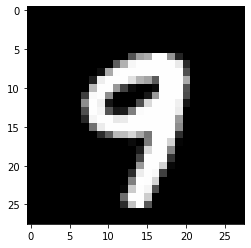

In [49]:
plt.imshow(X_test[1].reshape(28,28), cmap="gray")

In [50]:
accuracy(y_test[:50], pred)

1.0